# Sample usage

In [31]:
from model_criticism_mmd import ModelTrainerTorchBackend

In [32]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Scenario-1: 2 distributions are similar

In [33]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [34]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

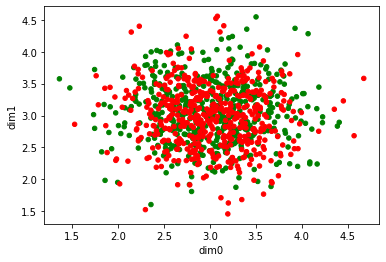

In [35]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c='label')

In [36]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [37]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Getting median initial sigma value...
initial sigma by median-heuristics 0.501
Validation at 0. MMD^2 = 0.02467770900678601, obj-value = [-0.39396392] at sigma = [0.50134419]
[before optimization] sigma value = [0.50134419]
     5: avg train MMD^2 0.011018686325811988 obj [-3.25210664],  avg val MMD^2 0.02231034745241771  obj [-1.89549225]  elapsed: 0.0 sigma: [0.12417747]
    25: avg train MMD^2 0.013340451200023556 obj [-4.86129435],  avg val MMD^2 0.024997359876438384  obj [-5.52135531]  elapsed: 0.0 sigma: [0.00630071]
    50: avg train MMD^2 0.013348619885965305 obj [-4.86210918],  avg val MMD^2 0.02499935313404217  obj [-5.52143504]  elapsed: 0.0 sigma: [0.00565405]
   100: avg train MMD^2 0.013349081233653911 obj [-4.86215513],  avg val MMD^2 0.02499912917363045  obj [-5.52142608]  elapsed: 0.0 sigma: [0.00577857]
   200: avg train MMD^2 0.013384388980754992 obj [-4.86386209],  avg val MMD^2 0.024998390536236325  obj [-5.52139654]  e

In [38]:
print(f'Preffered parameters sigma = {trained_obj.sigma} / scales = {trained_obj.scales}')

Preffered parameters sigma = -5.080965905398062 / scales = [1.8078784 4.26001  ]


In [39]:
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

MMD^2 distance = 0.0008764173290964905


# Scenario-2: 2 distributions are not similar

In [40]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(10, 5.5, size=(500, 2))

In [41]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

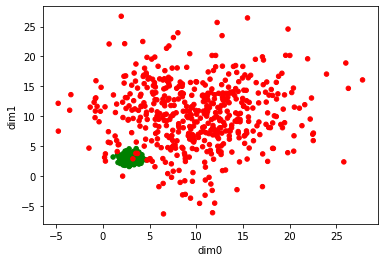

In [42]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c='label')

In [43]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [44]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Getting median initial sigma value...
initial sigma by median-heuristics 1.92
Validation at 0. MMD^2 = 0.7227586822078343, obj-value = [-2.29320586] at sigma = [1.91776107]
[before optimization] sigma value = [1.91776107]
     5: avg train MMD^2 0.9312489326686639 obj [-3.62301647],  avg val MMD^2 0.8761157798547864  obj [-3.37906433]  elapsed: 0.0 sigma: [1.42816009]
    25: avg train MMD^2 0.8454804099551032 obj [-3.78393272],  avg val MMD^2 0.8265690038646737  obj [-3.45222653]  elapsed: 0.0 sigma: [1.52664408]
    50: avg train MMD^2 0.8453095483715812 obj [-3.77352948],  avg val MMD^2 0.8309827649792717  obj [-3.44977272]  elapsed: 0.0 sigma: [1.54637877]
   100: avg train MMD^2 0.8452072797480084 obj [-3.76877238],  avg val MMD^2 0.8356735887201999  obj [-3.44684461]  elapsed: 0.0 sigma: [1.56411587]
   200: avg train MMD^2 0.8568852815553117 obj [-3.78178137],  avg val MMD^2 0.8391831494609044  obj [-3.4439308]  elapsed: 0.0 sigma: [

In [45]:
print(f'Preffered parameters sigma = {trained_obj.sigma} / scales = {trained_obj.scales}')
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

Preffered parameters sigma = 0.46855348577570355 / scales = [1.0358964  0.91877747]
MMD^2 distance = 0.3254127153506848


# Scenario-3: ARD weight

As you see in data generation, the data has huge variance only on __the 1st dimension__.

Then, the ARD weight has the highest value on the 1st dimension.

In [47]:
import numpy
size = 100
n_epoch = 500
batch_size = 200

x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:80]
y_train = y[:80]
x_val = x[80:]
y_val = y[80:]

In [49]:
for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for

1 dim. mean(x)=1.0 mean(y)=8.137320711871457 var(x)=0.0 var(y)=2045.7369519321537
2 dim. mean(x)=9.979075575115694 mean(y)=10.000509841890187 var(x)=0.03867477144396529 var(y)=0.04765720483814483
3 dim. mean(x)=10.00026736804804 mean(y)=9.986650779454592 var(x)=0.041975022612766005 var(y)=0.04257805110712945


## Note

Make sure that __opt_sigma = False__ when you need ARD weights.

In [50]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=500, batchsize=200, opt_sigma=False)

input data N(sample-size)=80, N(dimension)=3
Getting median initial sigma value...
initial sigma by median-heuristics 1.05
Validation at 0. MMD^2 = 0.5334124737754999, obj-value = [-1.25017811] at sigma = [1.04997044]
[before optimization] sigma value = [1.04997044]
     5: avg train MMD^2 0.9093351929516904 obj [-3.0703169],  avg val MMD^2 0.9688876727076254  obj [-2.87939507]  elapsed: 0.0 sigma: [1.04997044]
    25: avg train MMD^2 1.0178232605404884 obj [-6.32322188],  avg val MMD^2 1.059039698403885  obj [-7.00037974]  elapsed: 0.0 sigma: [1.04997044]
    50: avg train MMD^2 1.02002638311766 obj [-6.64465254],  avg val MMD^2 1.0619506121373206  obj [-9.01256406]  elapsed: 0.0 sigma: [1.04997044]
   100: avg train MMD^2 1.0194735887166722 obj [-6.83222752],  avg val MMD^2 1.0624407505905902  obj [-9.27090923]  elapsed: 0.0 sigma: [1.04997044]
   200: avg train MMD^2 1.0185598746355067 obj [-7.04034139],  avg val MMD^2 1.0624857722792198  obj [-9.2709516]  elapsed: 0.0 sigma: [1.049

In [51]:
trained_obj.scales

array([ 9.4123650e+00, -6.0238526e-04, -5.7265814e-03], dtype=float32)

# Scenario-4: 2 sample test

Note: You have to install "full" version to run the codes.

You will have a statistical test which checks 2 distributions are identical.

In [53]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [54]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

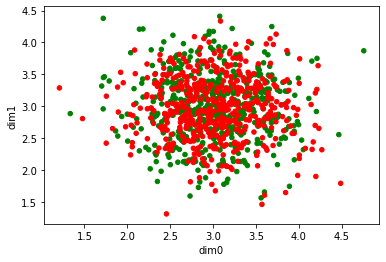

In [55]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c='label')

In [56]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [58]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=500, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Getting median initial sigma value...
initial sigma by median-heuristics 0.647
Validation at 0. MMD^2 = 0.010216036189873323, obj-value = [-4.62654375] at sigma = [0.64693612]
[before optimization] sigma value = [0.64693612]
     5: avg train MMD^2 0.009422191168280997 obj [-2.6082463],  avg val MMD^2 0.021600137065338698  obj [-1.27785256]  elapsed: 0.0 sigma: [0.34759341]
    25: avg train MMD^2 0.013490083659907084 obj [-4.60489493],  avg val MMD^2 0.025215139196338023  obj [-4.3948463]  elapsed: 0.0 sigma: [0.01507081]
    50: avg train MMD^2 0.013335107967223037 obj [-4.86076043],  avg val MMD^2 0.025250259970176516  obj [-4.62697701]  elapsed: 0.0 sigma: [0.00597223]
   100: avg train MMD^2 0.013306598548153085 obj [-4.85790222],  avg val MMD^2 0.02524429866593429  obj [-4.65086093]  elapsed: 0.0 sigma: [0.0056874]
   200: avg train MMD^2 0.013322494702064352 obj [-4.85995098],  avg val MMD^2 0.02518939622144723  obj [-4.90323851]  el

In [63]:
from model_criticism_mmd.supports.mmd_two_sample_test import rbf_mmd_test

res = rbf_mmd_test(x=x_test, y=y_test, trained_params=trained_obj)
p_value = res[0]
print(p_va)